# Object Detection


Object detection in the realm of image processing is the process by which an image or video is taken, and elements within it are uniquley identified. In theory, it can be used on any class of objects with shared conceptual features, but in practice it works best on highly detailed strucutres.

By far, the most common example is the human face, such as seen below.

In [1]:
#Imports

from IPython.core.display import Image 
import cv2
from matplotlib import pyplot as plt


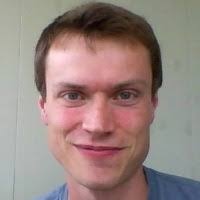

In [2]:
Image('Bergen.jpg')

## For an Image above we can pull out:

-the entire face

-subdetails of the face

-the count of any of those details


However in order to do that you also need a classifier, found here: 
https://github.com/opencv/opencv/tree/master/data/haarcascades

Simply download the .xml of your choosing and place it in your working directory.




As for how the classifiers work in specific, they analyze positive cases looking for edge features in each image by subtracting the sum of pixels in different proportions of pieces of the image to extract Haar features (shown below).

## To implement this:

-load an image

-convert to grayscale

-search for Haar features using a classifier

-iterate over an entire image


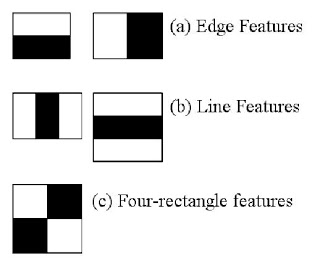

In [4]:
Image('haar_features.jpg')

## How can we do this efficently

Cascading:

-create sets of rules in order of importance

-run image through each series of rules, if it fails a series, don't run it through the rest

-earlier sets tend to have less rules

-we can identify negatives much more quickly

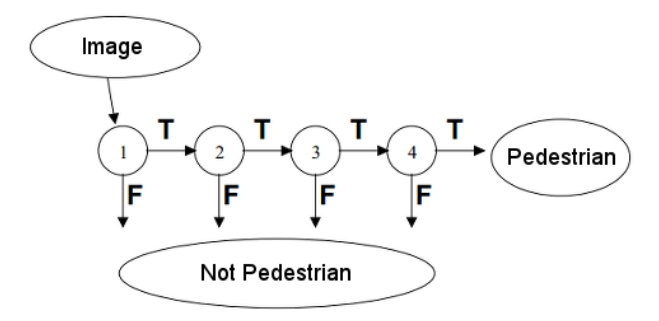

In [5]:
Image('Cascaded_Classifier.PNG')

An example implementation on our face is seen below:

In [6]:
##imports

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [7]:
##import the classifiers

face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier('haarcascade_eye.xml')


In [8]:
#read image in

img = cv.imread('Bergen.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [9]:
#convert to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [10]:
#detect faces

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
faces
        


array([[ 30,  45, 134, 134]], dtype=int32)

Running our classifier, it appears to have found the face. We can vizualize what it has found using Matplotlib

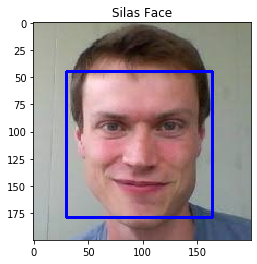

In [11]:
#for every face found, draw a box around it in the image

for (x,y,w,h) in faces:
    cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

plt.imshow(img[:,:,::-1])
plt.title('Silas Face')
plt.show()

## Partitioning the Image for accuracy:

-Remove background noise

-search for details within details

-we only want to find eyes on faces

-prevents false positives

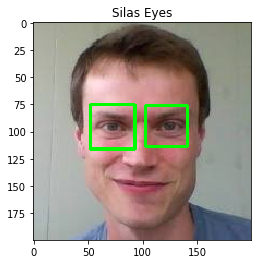

In [12]:
#Eye example

img = cv.imread('Bergen.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.imshow(img[:,:,::-1])
plt.title('Silas Eyes')
plt.show()

In [13]:
#new classifier
smile_cascade = cv.CascadeClassifier('haarcascade_smile.xml')


img = cv.imread('Bergen.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

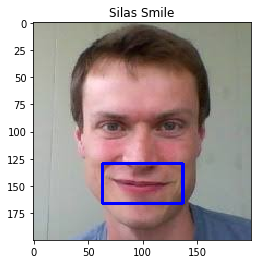

In [14]:
#in this example, we show that you do not have to parition on a face first, though that may make it more reliable

smiles = smile_cascade.detectMultiScale(gray, 1.3, 9)
for (x,y,w,h) in smiles:
    cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    
plt.imshow(img[:,:,::-1])
plt.title('Silas Smile')
plt.show()

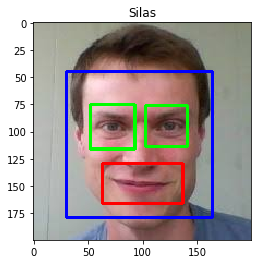

In [115]:
##example for finding smile and eyes within a face from start to finsish

img = cv.imread('Bergen.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
for (x,y,w,h) in faces: #all in face
    cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        smiles = smile_cascade.detectMultiScale(gray, 1.3, 9)
        for (sx,sy,sw,sh) in smiles:
                cv.rectangle(img,(sx,sy),(sx+sw,sy+sh),(0,0,255),2)
        
plt.imshow(img[:,:,::-1])
plt.title('Silas')
plt.show()

# Lets add more faces



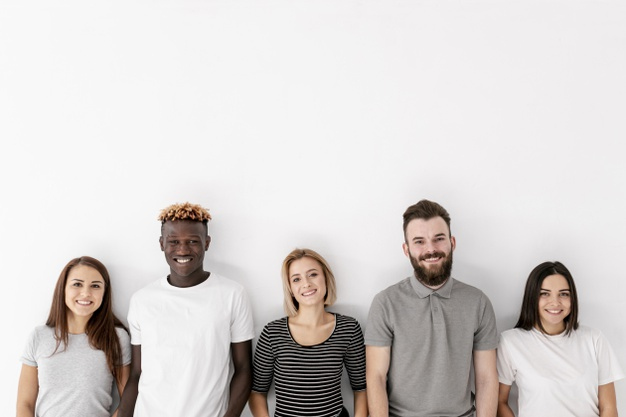

In [22]:
###crowd image here

Image('Small_crowd.jpg')

## To count the faces classified in a image:

-Run the classifier on the whole image

-count the faces found

-return the count

-optionally draw a border around each face



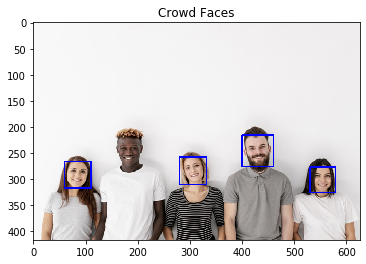

In [44]:

img = cv.imread('Small_crowd.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)

counter = 0
for (x,y,w,h) in faces:
    counter = counter + 1
    cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    

plt.imshow(img[:,:,::-1])
plt.title('Crowd Faces')
plt.show()


In [37]:
#print out the count, should be 5

print(counter)

4


## We appear to have missed a face, why?


Tune a model for improvement:

-two main parameters to adjust: Scale and nearest neighbor

-scale effects how many slices of the image are processed together

-nearest neighbor effects how many features have to be closed together to find a face

-adjust like any other ML model

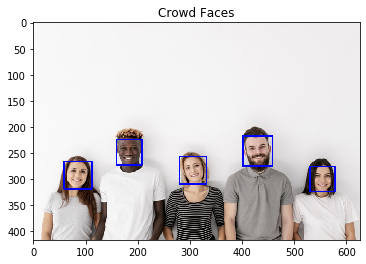

In [72]:
img = cv.imread('Small_crowd.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.1, 5) #adjusted parameters

counter = 0
for (x,y,w,h) in faces:
    counter = counter + 1
    cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    smiles = smile_cascade.detectMultiScale(roi_gray, 1.3, 9)


plt.imshow(img[:,:,::-1])
plt.title('Crowd Faces')
plt.show()

In [34]:
#print out the count, should be 5

print(counter)

5


## Use cases:

-venue planners wanting a true count of attendence

-automatically searching lots of image for a faces

-looking for objects other then faces




In [87]:
body_cascade = cv.CascadeClassifier('haarcascade_fullbody.xml')


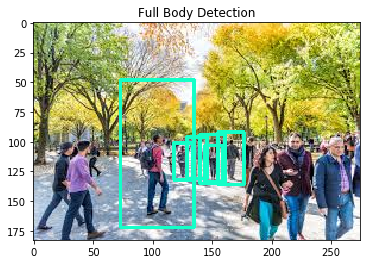

In [114]:

img = cv.imread('fullbody.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

humans = body_cascade.detectMultiScale(gray, 1.05, 1)
for (x,y,w,h) in humans:
    cv.rectangle(img,(x,y),(x+w,y+h),(200,255,20),2)
        
plt.imshow(img[:,:,::-1])
plt.title('Full Body Detection')
plt.show()

## Further Usage


In addition, with facial detection:

-implement everything shown here on real time video (.ipynb compatibility is lost)

-deploy it large scale to rapidly process data in real time

-detect cats (download the classifier https://github.com/opencv/opencv/tree/master/data/haarcascades)

-make your own classifier: https://docs.opencv.org/3.4/dc/d88/tutorial_traincascade.html




However, we should always be wary of ethical concerns when working with private images and other peoples faces. Do not use data science for evil.

### References

Object Detection Algorithm:

https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf

Implementation:

https://docs.opencv.org/4.4.0/d2/d64/tutorial_table_of_content_objdetect.html

Cascaded Classifer visual:

https://www.researchgate.net/figure/An-example-of-a-cascading-classifier-for-classifying-image-element-as-pedestrian_fig4_331727963

Facial Recongition contraversy:

https://www.nytimes.com/2019/05/15/business/facial-recognition-software-controversy.html

Crowd Image:

https://salud-america.org/walking-and-biking-are-way-up-during-covid-19-revealing-big-inequities-in-open-spaces/

Silas Bergen's Face:

https://www.causeweb.org/cause/uscots/uscots19/workshop/2




